## Needed libraries:
 - $\texttt{cfgrib}$ as an engine
 - $\texttt{xarray}$ to open .grib files

In [19]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [3]:
ds = xr.open_dataset('temp.grib', engine='cfgrib')

In [5]:
ds

<xarray.Dataset> Size: 11MB
Dimensions:        (time: 744, isobaricInhPa: 4, latitude: 23, longitude: 41)
Coordinates:
    number         int64 8B ...
  * time           (time) datetime64[ns] 6kB 2024-01-01 ... 2024-01-31T23:00:00
    step           timedelta64[ns] 8B ...
  * isobaricInhPa  (isobaricInhPa) float64 32B 1e+03 975.0 950.0 925.0
  * latitude       (latitude) float64 184B 54.5 54.25 54.0 ... 49.5 49.25 49.0
  * longitude      (longitude) float64 328B 14.07 14.32 14.57 ... 23.82 24.07
    valid_time     (time) datetime64[ns] 6kB ...
Data variables:
    t              (time, isobaricInhPa, latitude, longitude) float32 11MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-02T22:55 GRIB to CDM+CF via cfgrib-0.9.1...

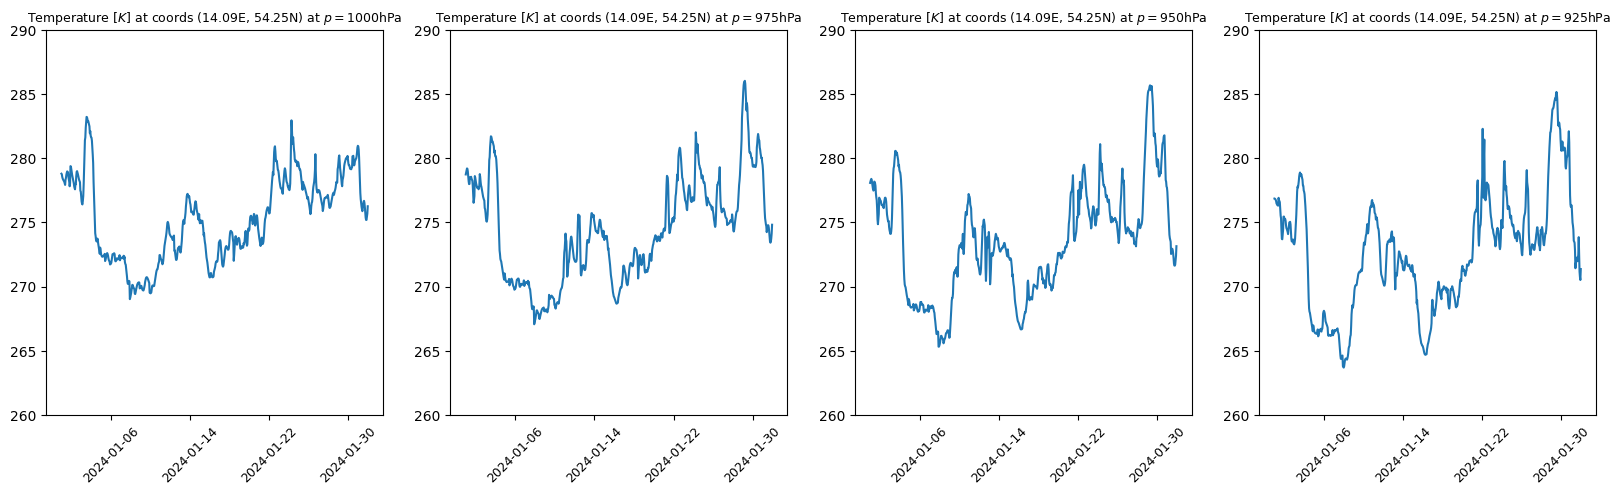

In [30]:
x = ds.time
y = [ds.t[:,i,1,1] for i in range(0,len(ds.isobaricInhPa))] ###observations from different isobaric levels, but at specific geographical coordinates
titles = [r"Temperature $[K]$ at coords (14.09E, 54.25N) at $p=1000 \text{hPa}$",r"Temperature $[K]$ at coords (14.09E, 54.25N) at $p=975 \text{hPa}$",r"Temperature $[K]$ at coords (14.09E, 54.25N) at $p=950 \text{hPa}$",r"Temperature $[K]$ at coords (14.09E, 54.25N) at $p=925 \text{hPa}$"]


fig, axs = plt.subplots(1, 4, figsize=(20, 5)) 

for i, (y, title) in enumerate(zip(y, titles)):
    axs[i].plot(x, y,label=title)
    axs[i].set_title(title, fontsize = 9)
    axs[i].set_xticks(x)
    axs[i].tick_params(axis='x', rotation=45, labelsize=9)
    axs[i].xaxis.set_major_locator(MaxNLocator(nbins=5))
    axs[i].set_ylim(260, 290)